# fbprophet

In [ ]:
#Steps to install fbprophet
#conda install anaconda
#conda update anaconda
#conda update conda
#conda install libpython m2w64-toolchain -c msys2   # To install packages of c and c++
#pip install pystan
#pip install fbprophet

In [1]:
#Library Files
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [3]:
# load the car sales dataset

# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


In [10]:
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


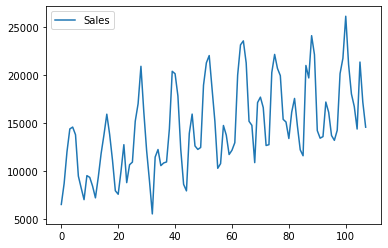

In [4]:
# load and plot the car sales dataset

# plot the time series
df.plot()
plt.show()

In [5]:
# prepare expected column names

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      108 non-null    datetime64[ns]
 1   y       108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [13]:
#Prepare Model
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


# Make an In-Sample Forecasy

In [14]:
df.tail(15)

,ds,y
93,1967-10-01,17187
94,1967-11-01,16119
95,1967-12-01,13713
96,1968-01-01,13210
97,1968-02-01,14251
98,1968-03-01,20139
99,1968-04-01,21725
100,1968-05-01,26099
101,1968-06-01,21084
102,1968-07-01,18024


In [21]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
future['ds']   


0    1968-01-01
1    1968-02-01
2    1968-03-01
3    1968-04-01
4    1968-05-01
5    1968-06-01
6    1968-07-01
7    1968-08-01
8    1968-09-01
9    1968-10-01
10   1968-11-01
11   1968-12-01
Name: ds, dtype: datetime64[ns]

In [27]:
#use the model to make a forecast
forecast = model.predict(future)
forecast

C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17821.176926,12779.752649,15942.571318,17821.176926,17821.176926,-3452.491608,-3452.491608,-3452.491608,-3452.491608,-3452.491608,-3452.491608,0.0,0.0,0.0,14368.685318
1,1968-02-01,17876.059733,13349.671169,16613.838003,17876.059733,17876.059733,-2935.247462,-2935.247462,-2935.247462,-2935.247462,-2935.247462,-2935.247462,0.0,0.0,0.0,14940.812271
2,1968-03-01,17927.401713,19343.851680,22546.801950,17927.401713,17927.401713,2941.820893,2941.820893,2941.820893,2941.820893,2941.820893,2941.820893,0.0,0.0,0.0,20869.222606
3,1968-04-01,17982.284520,21321.340408,24539.538571,17982.284520,17982.284520,4917.879680,4917.879680,4917.879680,4917.879680,4917.879680,4917.879680,0.0,0.0,0.0,22900.164200
4,1968-05-01,18035.396913,22691.491273,25775.236445,18035.396913,18035.396913,6171.464062,6171.464062,6171.464062,6171.464062,6171.464062,6171.464062,0.0,0.0,0.0,24206.860975
5,1968-06-01,18090.279720,19517.806049,22658.925814,18090.279720,18090.279720,3003.257678,3003.257678,3003.257678,3003.257678,3003.257678,3003.257678,0.0,0.0,0.0,21093.537397
6,1968-07-01,18143.392113,15993.620514,19242.523401,18143.392113,18143.392113,-535.594232,-535.594232,-535.594232,-535.594232,-535.594232,-535.594232,0.0,0.0,0.0,17607.797881
7,1968-08-01,18198.274920,13759.779844,16877.407905,18198.274920,18198.274920,-2888.104635,-2888.104635,-2888.104635,-2888.104635,-2888.104635,-2888.104635,0.0,0.0,0.0,15310.170285
8,1968-09-01,18253.157726,12230.505193,15252.322137,18253.157726,18253.157726,-4512.992104,-4512.992104,-4512.992104,-4512.992104,-4512.992104,-4512.992104,0.0,0.0,0.0,13740.165622
9,1968-10-01,18306.270120,16409.704333,19627.820604,18306.270120,18306.270120,-156.006807,-156.006807,-156.006807,-156.006807,-156.006807,-156.006807,0.0,0.0,0.0,18150.263313


In [24]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14368.685318  12788.484691  15983.732829
1 1968-02-01  14940.812271  13401.652535  16581.205650
2 1968-03-01  20869.222606  19316.909946  22450.609080
3 1968-04-01  22900.164200  21296.845945  24536.510351
4 1968-05-01  24206.860975  22731.171249  25814.630919


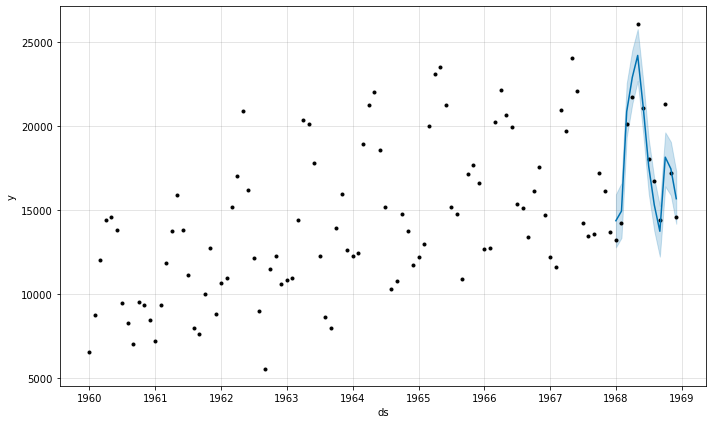

In [28]:
# plot forecast
model.plot(forecast)
plt.show()

# Make an Out-of-Sample Forecast

In [34]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
future

,ds
0,1969-01-01
1,1969-02-01
2,1969-03-01
3,1969-04-01
4,1969-05-01
5,1969-06-01
6,1969-07-01
7,1969-08-01
8,1969-09-01
9,1969-10-01


C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


           ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  1969-01-01  18469.148126  13901.142321  16965.951977  18469.112637   
1  1969-02-01  18524.030933  14778.054651  17761.729305  18522.645833   
2  1969-03-01  18573.602500  19793.403584  22936.291085  18570.739001   
3  1969-04-01  18628.485306  22090.671314  25070.417079  18623.082473   
4  1969-05-01  18681.597700  23443.004798  26605.558035  18674.179018   
5  1969-06-01  18736.480506  20672.614748  23759.971005  18726.073563   
6  1969-07-01  18789.592900  16447.470363  19430.584985  18775.523796   
7  1969-08-01  18844.475706  14293.688717  17256.832192  18826.597274   
8  1969-09-01  18899.358513  12655.149783  15745.424290  18876.666591   
9  1969-10-01  18952.470906  17065.377892  20224.490758  18926.480164   
10 1969-11-01  19007.353713  17008.260522  20207.381468  18977.738562   
11 1969-12-01  19060.466106  14834.990467  17971.688699  19025.986843   

     trend_upper  additive_terms  additive_terms_l

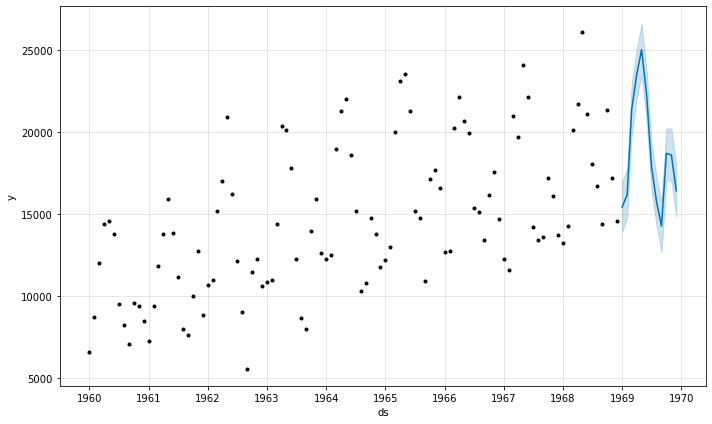

In [53]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast)
# plot forecast
model.plot(forecast)
plt.show()

# Manually Evaluate Forecast Model

In [41]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [112]:
# create train dataset, remove last 12 months
train = df.drop(df.index[-12:])
test=df[-12:]

In [109]:
test

,ds,y
96,1968-01-01,13210
97,1968-02-01,14251
98,1968-03-01,20139
99,1968-04-01,21725
100,1968-05-01,26099
101,1968-06-01,21084
102,1968-07-01,18024
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342


In [68]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
# use the model to make a forecast
forecast = model.predict(test)
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


MAE: 1058.482


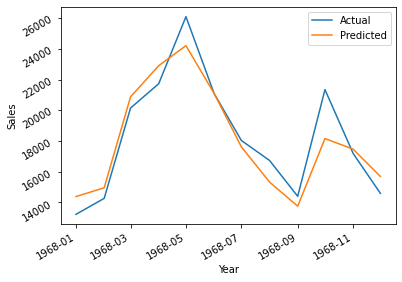

In [123]:
# plot expected vs actual
plt.plot(test.ds,y_true, label='Actual')
plt.plot(test.ds,y_pred, label='Predicted')
plt.xlabel('Year')
plt.ylabel("Sales")
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=30, ha='right')
plt.legend()
plt.show()